Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.


Answer(Q1):



<AxesSubplot: xlabel='species', ylabel='petal_width'>

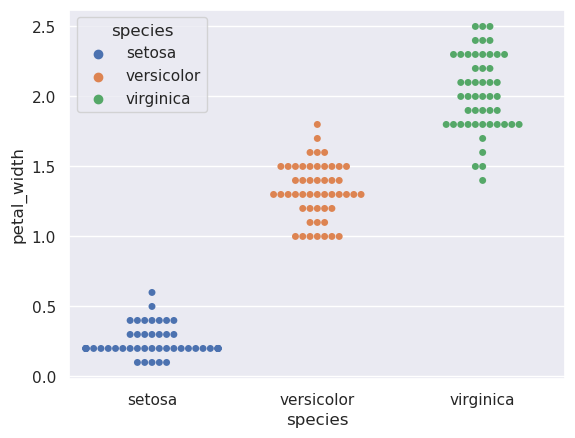

In [32]:
# IMPORTING REQUIRED LIBRARIES & ASSIGNING ALIASES:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Loading built-in Datasets:
df = sns.load_dataset("iris")

sns.set()

sns.swarmplot(x="species",y="petal_width",hue='species', data=df)

<AxesSubplot: xlabel='species', ylabel='petal_length'>

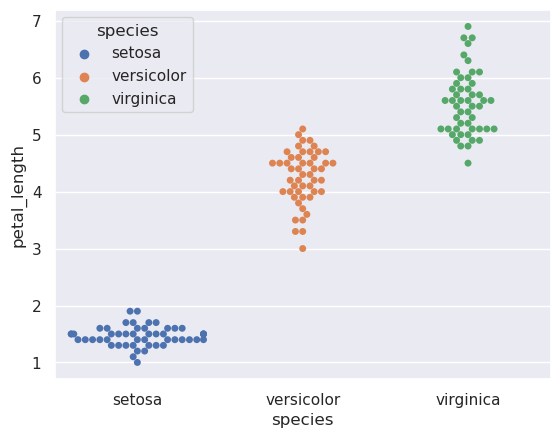

In [33]:
sns.swarmplot(x="species",y="petal_length",hue='species', data=df)

In [34]:
# Select all rows and all columns except the last one
X = df.iloc[:, :-1]

# Select all rows and only the last column
y = df.iloc[:, -1]
# print(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [36]:
y_pred=classifier.predict(X_test_scaled)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [38]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.


Answer(Q2):

KNN regressor:


In [39]:
# IMPORTING REQUIRED LIBRARIES & ASSIGNING ALIASES:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

# Loading built-in Datasets:
df = sns.load_dataset("iris")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
df['species'] = label_encoder.fit_transform(df['species'])

# Select all rows and all columns except the last one
X = df.iloc[:, :-1]

# Select all rows and only the last column
y = df.iloc[:, -1]
# print(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessing: Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
regressor.fit(X_train_scaled,y_train)

y_pred=regressor.predict(X_test_scaled)


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9865486725663717
0.036842105263157884
0.009473684210526311


Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets.




In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# defining parameter range
param_grid = {'n_neighbors': [1,2,3,4,5],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1,2]
              }

In [42]:
grid=GridSearchCV(classifier,param_grid=param_grid,refit=True,cv=5,verbose=3)

In [43]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.957 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.957 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.773 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.955 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.955 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.957 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.957 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.818 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.955 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.955 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=2, p=1;, score=0.913 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=2, p=1

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2]},
             verbose=3)

In [44]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}

Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets.

Answer(Q4):


In [49]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(data)

# Optionally, you can specify column names and index labels
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']  # Replace with your column names
df.columns = column_names

df['Price'] = target
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Preprocessing: Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
regressor.fit(X_train_scaled,y_train)

y_pred=regressor.predict(X_test_scaled)


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.7123844635500011
2.556850393700788
20.14089448818898


Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.


Answer(Q5):

You can implement a K-Nearest Neighbors (KNN) classifier algorithm with weighted voting on the `load_iris` dataset from scikit-learn using the `KNeighborsClassifier` class. In KNN, you can implement weighted voting by assigning weights to the nearest neighbors based on their distance. 

In [51]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with weighted voting (use weights='distance')
k = 5  # Number of neighbors
weights = 'distance'
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 1.00


In this code:

1. We load the `load_iris` dataset and split it into training and testing sets.

2. We create a KNN classifier using `KNeighborsClassifier` with `n_neighbors` set to the number of neighbors (`k`) We want to consider.

3. We specify `weights='distance'` to implement weighted voting based on the distance to neighbors. This means closer neighbors have more influence on the prediction.

4. We fit the KNN classifier on the training data.

5. We make predictions on the test data using the trained classifier.

6. Finally, we calculate the accuracy of the classifier to evaluate its performance.

We can adjust the values of `k` and the weighting method to fine-tune the KNN classifier based on our requirements.

Q6. Implement a function to standardise the features before applying KNN classifier.


Answer(Q6):


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

import pandas as pd
import numpy as np

def knn_regressor_with_standardization(X_train, y_train, X_test, y_test, k=5, weights='uniform'):
    # Standardize the features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    regressor=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
    regressor.fit(X_train_scaled,y_train)
    y_pred=regressor.predict(X_test_scaled)
    from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
    print(r2_score(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))

    return 

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(data)
# Optionally, you can specify column names and index labels
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']  # Replace with your column names
df.columns = column_names
df['Price'] = target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


accuracy = knn_regressor_with_standardization(X_train, y_train, X_test, y_test)


0.7123844635500011
2.556850393700788
20.14089448818898


7. Write a Python function to calculate the euclidean distance between two points.

Answer(Q7):

In [56]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Example usage with specific point values
point1 = (1, 2)
point2 = (4, 6)

distance = euclidean_distance(point1, point2)
print(f"Euclidean Distance between {point1} and {point2}: {distance:.2f}")


Euclidean Distance between (1, 2) and (4, 6): 5.00


Q8. Write a Python function to calculate the manhattan distance between two points.

Answer(Q8):



In [57]:
def manhattan_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = abs(x2 - x1) + abs(y2 - y1)
    return distance

point1 = (1, 2)
point2 = (4, 6)

distance = manhattan_distance(point1, point2)
print(f"Manhattan Distance: {distance}")


Manhattan Distance: 7
